In [1]:
# preamble to be able to run notebooks in Jupyter and Colab
try:
    from google.colab import drive
    import sys
    
    drive.mount('/content/drive')
    notes_home = "/content/drive/Shared drives/CSC310/notes/"
    user_home = "/content/drive/My Drive/"
    
    sys.path.insert(1,notes_home) # let the notebook access the notes folder

except ModuleNotFoundError:
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory is the same as the notebook

# Unsupervised Learning

## K-Means for Blobs

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

/Users/lutz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


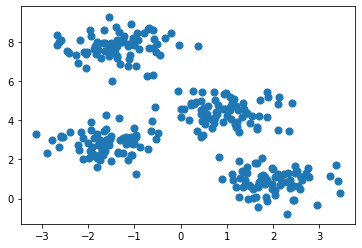

In [3]:
# generate blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show()

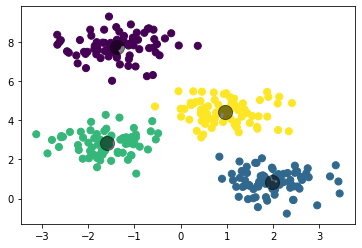

In [4]:
# cluster blobs with just the right value for k
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

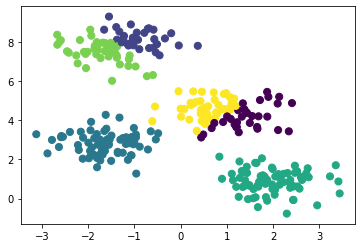

In [5]:
# cluster blobs with non-optimal value for k
# NOTE: fitting and predicting in the same function call!
labels = KMeans(6).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()


## The Elbow Method

In [6]:
# Source: http://www.slideshare.net/SarahGuido/kmeans-clustering-with-scikitlearn
def elbow(df, n):
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    import numpy as np
    from scipy.spatial.distance import cdist, pdist
    # kmeans models for each k
    kMeansVar = [KMeans(n_clusters=k).fit(df.values) for k in range(1, n+1)]
    # get the centroids of the models
    centroids = [X.cluster_centers_ for X in kMeansVar]
    # find the distances of the values to the centroids
    k_euclid = [cdist(df.values, cent) for cent in centroids]
    # find the distance of each point to its cluster center
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    # total within cluster sum of squares
    wcss = [sum(d**2) for d in dist]
    # total sum of squares
    tss = sum(pdist(df.values)**2)/df.values.shape[0]
    # between clusters sum of squares
    bss = tss - wcss
    plt.plot(list(range(1,n+1)),bss)
    plt.show()

Number of clusters: 5


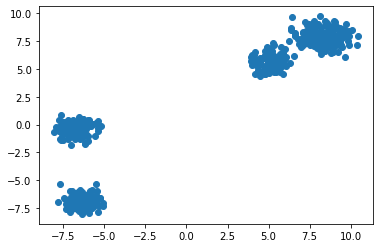

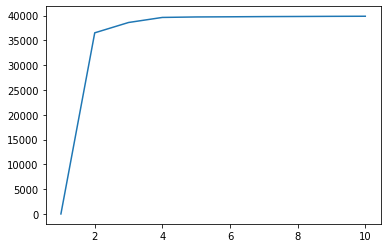

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

k = int(input("Number of clusters: "))

X, y_true = make_blobs(n_samples=k*100, centers=k, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1]);
plt.show()

Xdf = pd.DataFrame(X)
elbow(Xdf,10)

## K-Means and non-convex Clusters

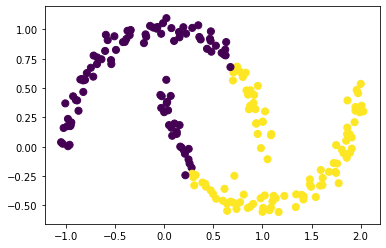

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05)
labels = KMeans(2).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.show()